## 1번 문제 (VotingClassifier)

VotingClassifier를 사용하여 breast_cancer 데이터를 분류 하시오.
  * LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier를 모두 VotingClassifier의 base estimator로 사용하시오.
  * parameter voting은 'soft'로 변경 해 accuracy를 측정하시오.


  ```python
  import pandas as pd

  df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                  'machine-learning-databases'
                  '/breast-cancer-wisconsin/wdbc.data', header=None)

  from sklearn.preprocessing import LabelEncoder

  breast_X = df.loc[:, 2:].values
  breast_y = df.loc[:, 1].values
  le = LabelEncoder()
  breast_y = le.fit_transform(y)
  le.classes_

  from sklearn.model_selection import train_test_split
  breast_X_train, breast_X_test, breast_y_train, y_test = train_test_split(breast_X, breast_y, test_size=0.20, stratify=y, random_state=1)
  ```






## 1번 문제 답안

### Setup

In [1]:
# common lib
import sklearn
import numpy as np

### Datasets


#### Breast cancer dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases'
                '/breast-cancer-wisconsin/wdbc.data', header=None)

from sklearn.preprocessing import LabelEncoder

breast_X = df.loc[:, 2:].values
breast_y = df.loc[:, 1].values
le = LabelEncoder()
breast_y = le.fit_transform(breast_y)
le.classes_

array(['B', 'M'], dtype=object)

### Preprocess

#### Splitting

In [3]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

### VotingClassifier

**-sklearn.ensemble.[VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) : Returns the instance itself.**

Soft Voting/Majority Rule classifier for unfitted estimators.

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf1 = DecisionTreeClassifier(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = LogisticRegression(solver='newton-cg')

estimators=[('clf1', clf1),('clf2', clf2),('clf3', clf3)]
vclf = VotingClassifier(estimators=estimators)

#### Evaluation
**hard voting, LogisticRegression__sovler='lbfgs'**
* DecisionTreeClassifier 정확도: 0.9510
* KNeighborsClassifier 정확도: 0.9650
* LogisticRegression 정확도: 0.9650
* VotingClassifier의 정확도: 0.9720

In [35]:
from sklearn.metrics import accuracy_score

clfs = [clf1, clf2, clf3]
for clf in clfs:
  clf.fit(breast_X_train, breast_y_train)
  pred = clf.predict(breast_X_test)
  class_name = clf.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(breast_y_test, pred)))

vclf.fit(breast_X_train, breast_y_train)
pred_vot = vclf.predict(breast_X_test)
print('VotingClassifier의 정확도: {0:.4f}'.format(accuracy_score(breast_y_test, pred_vot)))

DecisionTreeClassifier 정확도: 0.9510
KNeighborsClassifier 정확도: 0.9650
LogisticRegression 정확도: 0.9650
VotingClassifier의 정확도: 0.9720


## Set Hyperparameters

voting

### VotingClassifier(voting='soft')
####**voting**
* default = 'hard'
* ['hard', 'soft']
* If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

clf1 = DecisionTreeClassifier(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = LogisticRegression(solver='newton-cg')

estimators=[('clf1', clf1),('clf2', clf2),('clf3', clf3)]
soft_vclf = VotingClassifier(estimators=estimators, voting='soft')

#### Evaluation

**Hard voting performance**
* DecisionTreeClassifier 정확도: 0.9510
* KNeighborsClassifier 정확도: 0.9650
* LogisticRegression 정확도: 0.9650
* VotingClassifier의 정확도: 0.9720


In [38]:
from sklearn.metrics import accuracy_score

clfs = [clf1, clf2, clf3]
for clf in clfs:
  clf.fit(breast_X_train, breast_y_train)
  pred = clf.predict(breast_X_test)
  class_name = clf.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(breast_y_test, pred)))

soft_vclf.fit(breast_X_train, breast_y_train)
pred_vot = soft_vclf.predict(breast_X_test)
print('VotingClassifier(voting="soft")의 정확도: {0:.4f}'.format(accuracy_score(breast_y_test, pred_vot)))

DecisionTreeClassifier 정확도: 0.9510
KNeighborsClassifier 정확도: 0.9650
LogisticRegression 정확도: 0.9650
VotingClassifier(voting="soft")의 정확도: 0.9790


#### Result
**Best model performance**
* DecisionTreeClassifier 정확도: 0.9510
* KNeighborsClassifier 정확도: 0.9650
* LogisticRegression 정확도: 0.9650
* VotingClassifier(voting="soft")의 정확도: 0.9790



```python
clf1 = DecisionTreeClassifier(random_state=1)
clf2 = KNeighborsClassifier()
clf3 = LogisticRegression(solver='newton-cg')

estimators=[('clf1', clf1),('clf2', clf2),('clf3', clf3)]
soft_vclf = VotingClassifier(estimators=estimators, voting='soft')
```



## 2번 문제 (BaggingClassifier)

BaggingClassifier를 사용하여 wine 데이터를 분류 하시오.
  * DecisionTreeClassifier를 base estimator로 사용하시오.
  * validation_curve함수를 활용하여 parameter **max_features**를 조정하여 결과를 시각화하고, accuracy가 가장 높게 측정되는 max_features 값을 도출하시오.
  * wine dataset
  
  ```python
  from sklearn.datasets import load_wine

  wine = load_wine()
  ```

## 2번 문제 답안

### Setup

In [39]:
# Common imports
import sklearn
import numpy as np
import os

### Datasets



#### Wine dataset

In [40]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_name = wine.feature_names
print('Number of targets: ',len(set(wine_y)))

pd.DataFrame(wine_X, columns=wine_feature_name).head(3)

Number of targets:  3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


### Preprocess

#### Splitting

In [41]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state=42)

#### Scaling 
##### StandardScaler - 3장 참조
The standard score of a sample x is calculated as:

$z = \frac{(x - u)}{s}$

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_X_train_scale = scaler.fit_transform(wine_X_train)
wine_X_test_scale = scaler.transform(wine_X_test)

### BaggingClassifier

**-sklearn.ensemble.[BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) : Returns the instance itself.**

A Bagging classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# 단일 DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(wine_X_train_scale, wine_y_train)

# BaggingClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), bootstrap=True, random_state=42)
bag_clf.fit(wine_X_train_scale, wine_y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

#### Evaluation

In [44]:
from sklearn.metrics import accuracy_score

y_pred_train_bag = bag_clf.predict(wine_X_train_scale)
print('Train Accuracy(bag): {}'.format(accuracy_score(wine_y_train, y_pred_train_bag)))
y_pred_test_bag = bag_clf.predict(wine_X_test_scale)
print('Test Accuracy(bag): {}'.format(accuracy_score(wine_y_test, y_pred_test_bag)))

Train Accuracy(bag): 1.0
Test Accuracy(bag): 0.9777777777777777


## Improving performance

### Preprocess

#### Splitting

In [45]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state=42)

#### Scaling 
##### StandardScaler - 3장 참조
The standard score of a sample x is calculated as:

$z = \frac{(x - u)}{s}$

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_X_train_scale = scaler.fit_transform(wine_X_train)
wine_X_test_scale = scaler.transform(wine_X_test)

### Set Hyperparameters(n_estimator, max_samples)



#### Visualization 함수

In [47]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [48]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(max_samples)

##### **max_features**

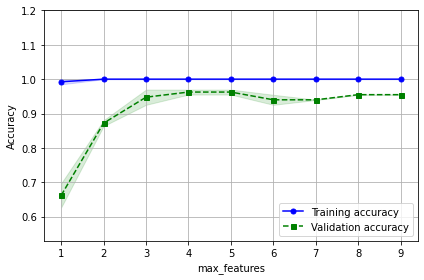

In [49]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1, 10)]
param_name = 'max_features'

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# BaggingClassifier
bag_clf_s = BaggingClassifier(
    DecisionTreeClassifier(), bootstrap=True, random_state=42)
bag_clf_s.fit(wine_X_train, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=bag_clf_s, 
                X=wine_X_train_scale, 
                y=wine_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous best performance**
* Train Accuracy(bag): 1.0
* Test Accuracy(bag): 0.9777777777777777

In [50]:
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# BaggingClassifier
proper_model_s = BaggingClassifier(
    DecisionTreeClassifier(), max_features=4, bootstrap=True, random_state=42)
proper_model_s.fit(wine_X_train_scale, wine_y_train)

predict = proper_model_s.predict(wine_X_train_scale)
print('Train Accuracy(max_samples): {}'.format(accuracy_score(wine_y_train, predict)))
predict = proper_model_s.predict(wine_X_test_scale)
print('Test Accuracy(max_samples): {}'.format(accuracy_score(wine_y_test, predict)))

Train Accuracy(max_samples): 1.0
Test Accuracy(max_samples): 1.0


#### Result
**Best model performance**
* Train Accuracy(max_samples): 1.0
* Test Accuracy(max_samples): 1.0



```python
BaggingClassifier(DecisionTreeClassifier(), max_features=4, bootstrap=True, random_state=42)
```



## 3번 문제(RandomForestClassifier)

RandomForestClassifier를 사용하여 Diabetes 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * criterion
    * n_estimators
    * min_samples_leaf
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.
  
  ```python
  from sklearn.datasets import load_diabetes

  diabetes = load_diabetes()
  ```

## 3번 문제 답안

## RandomForestClassifier with California Housing dataset

### Setup

In [51]:
# common lib
import sklearn
import numpy as np
import os

### Datasets


#### Breast cancer dataset

In [52]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases'
                '/breast-cancer-wisconsin/wdbc.data', header=None)

from sklearn.preprocessing import LabelEncoder

breast_X = df.loc[:, 2:].values
breast_y = df.loc[:, 1].values
le = LabelEncoder()
breast_y = le.fit_transform(breast_y)
le.classes_

from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, y_test = train_test_split(breast_X, breast_y, test_size=0.20, stratify=breast_y, random_state=1)

### Preprocess

#### Splitting

In [53]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

### RandomForestClassifier

**-sklearn.ensemble.[RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) : Returns the instance itself.**

A random forest classifier.

In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(breast_X_train, breast_y_train)

RandomForestClassifier(random_state=42)

#### Evaluation

In [55]:
from sklearn.metrics import accuracy_score

predict = rnd_clf.predict(breast_X_train)
print('Train Accuracy(breast): {}'.format(accuracy_score(breast_y_train, predict)))
predict = rnd_clf.predict(breast_X_test)
print('Test Accuracy(breast): {}'.format(accuracy_score(breast_y_test, predict)))

Train Accuracy(breast): 1.0
Test Accuracy(breast): 0.965034965034965


## Improving performance

### Set Hyperparameter(n_estimators, min_samples_leaf, criterion)



#### Visualization 함수

In [56]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.99, np.max(test_mean)*1.01])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(n_estimators)

##### **n_estimators**
* int, default=10
* The number of base estimators in the ensemble.

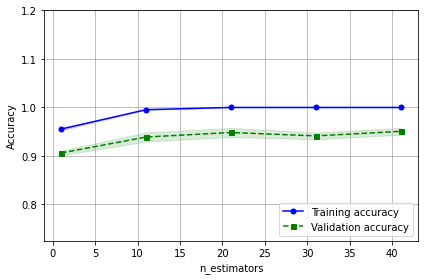

In [58]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,42, 10)]
param_name = 'n_estimators'

from sklearn.ensemble import RandomForestClassifier

rnd_clf_n = RandomForestClassifier(random_state=42)
rnd_clf_n.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=rnd_clf_n, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name= param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default model performance**
* Train Accuracy(breast): 1.0
* Test Accuracy(breast): 0.965034965034965

In [59]:
from sklearn.ensemble import RandomForestClassifier

proper_clf_m = RandomForestClassifier(n_estimators=21,random_state=42)
proper_clf_m.fit(breast_X_train, breast_y_train)

from sklearn.metrics import accuracy_score

predict = proper_clf_m.predict(breast_X_train)
print('Train Accuracy(n_estimators): {}'.format(accuracy_score(breast_y_train, predict)))
predict = proper_clf_m.predict(breast_X_test)
print('Test Accuracy(n_estimators): {}'.format(accuracy_score(breast_y_test, predict)))

Train Accuracy(n_estimators): 0.9976525821596244
Test Accuracy(n_estimators): 0.972027972027972


#### Validation_curve(min_samples_leaf)

##### **min_samples_leaf**

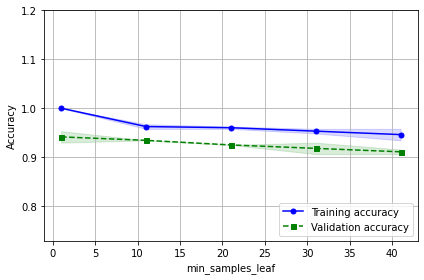

In [60]:
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,42, 10)]
param_name = 'min_samples_leaf'

from sklearn.ensemble import RandomForestClassifier

rnd_clf_n = RandomForestClassifier(random_state=42)
rnd_clf_n.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=rnd_clf_n, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name= param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default model performance**
* Train Accuracy(min_samples_split): 0.9976525821596244
* Test Accuracy(min_samples_split): 0.972027972027972

In [61]:
from sklearn.ensemble import RandomForestClassifier

proper_clf_m = RandomForestClassifier(n_estimators=21, min_samples_leaf=1, random_state=42)
proper_clf_m.fit(breast_X_train, breast_y_train)

from sklearn.metrics import accuracy_score

predict = proper_clf_m.predict(breast_X_train)
print('Train Accuracy(min_samples_split): {}'.format(accuracy_score(breast_y_train, predict)))
predict = proper_clf_m.predict(breast_X_test)
print('Test Accuracy(min_samples_split): {}'.format(accuracy_score(breast_y_test, predict)))

Train Accuracy(min_samples_split): 0.9976525821596244
Test Accuracy(min_samples_split): 0.972027972027972


#### Validation_curve(criterion)

##### **criterion**

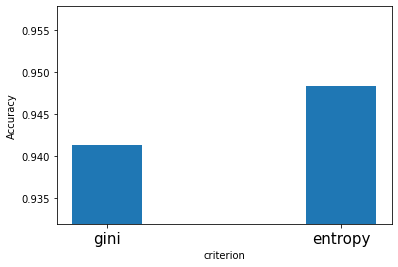

In [62]:
from sklearn.model_selection import validation_curve

param_range= ['gini','entropy']
param_name = 'criterion'

from sklearn.ensemble import RandomForestClassifier

rnd_clf_n = RandomForestClassifier(random_state=42)
rnd_clf_n.fit(breast_X_train, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=rnd_clf_n, 
                X=breast_X_train, 
                y=breast_y_train, 
                param_name= param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default model performance**
* Train Accuracy(min_samples_split): 0.9976525821596244
* Test Accuracy(min_samples_split): 0.972027972027972

In [63]:
from sklearn.ensemble import RandomForestClassifier

proper_clf_m = RandomForestClassifier(n_estimators=21, min_samples_leaf=1, criterion='entropy', random_state=42)
proper_clf_m.fit(breast_X_train, breast_y_train)

from sklearn.metrics import accuracy_score

predict = proper_clf_m.predict(breast_X_train)
print('Train Accuracy(min_samples_split): {}'.format(accuracy_score(breast_y_train, predict)))
predict = proper_clf_m.predict(breast_X_test)
print('Test Accuracy(min_samples_split): {}'.format(accuracy_score(breast_y_test, predict)))

Train Accuracy(min_samples_split): 0.9976525821596244
Test Accuracy(min_samples_split): 0.9790209790209791


#### Result
**Best model performance**
* Train Accuracy(min_samples_split): 0.9976525821596244
* Test Accuracy(min_samples_split): 0.9790209790209791



```python
RandomForestClassifier(n_estimators=21, min_samples_leaf=1, criterion='entropy', random_state=42)
```

